In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [3]:
nfl_df_analysis = pd.read_csv("spreadspoke_scores_for_analysis.csv")

In [4]:
nfl_df_analysis.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,weather_wind_mph,weather_humidity,weather_detail,total_score,over_under,spread_diff,cover,spread_diff_absolute,game_score_diff_abs,score_category
0,2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,Tampa Bay Buccaneers,...,9.0,87.0,NaN,47.0,over,12.0,yes,12.0,15.0,3 TDs
1,2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,Miami Dolphins,...,15.0,74.0,NaN,16.0,under,-3.0,no,3.0,2.0,FG
2,2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,Chicago Bears,...,11.0,68.0,NaN,9.0,under,0.0,push,0.0,3.0,FG
3,2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,Denver Broncos,...,6.0,38.0,NaN,10.0,under,7.0,yes,7.0,10.0,2 TDs
4,2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,Kansas City Chiefs,...,8.0,71.0,NaN,14.0,under,13.0,yes,13.0,14.0,2 TDs


In [5]:
nfl_df_analysis['game_score_diff_abs'].value_counts()

3.0     1478
7.0      798
6.0      572
10.0     555
4.0      521
14.0     468
1.0      412
2.0      378
17.0     343
5.0      315
13.0     302
11.0     295
8.0      287
21.0     273
20.0     231
24.0     217
16.0     215
18.0     206
9.0      165
15.0     158
12.0     156
28.0     156
27.0     147
31.0     118
23.0     109
19.0     109
25.0      91
22.0      88
35.0      59
34.0      59
26.0      56
30.0      54
32.0      51
38.0      45
29.0      44
37.0      29
33.0      27
0.0       22
42.0      15
41.0      14
36.0      12
45.0      11
40.0       7
44.0       7
39.0       6
43.0       5
48.0       3
46.0       2
49.0       2
54.0       2
52.0       1
53.0       1
55.0       1
51.0       1
58.0       1
59.0       1
Name: game_score_diff_abs, dtype: int64

In [48]:
#create bins
bins = [0,3,6,7,8,14,21,60]
labels = ['FG','TD','TD + EX PT','TD + 2PT','2 TDs','3 TDs', 'BLOWOUT']

In [49]:
#added a new column called score_category and put the data series into the new column within the df
nfl_df_analysis['score_category'] = pd.cut(nfl_df_analysis['game_score_diff_abs'],bins,labels = labels)

In [50]:
nfl_df_analysis.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,weather_wind_mph,weather_humidity,weather_detail,total_score,over_under,spread_diff,cover,spread_diff_absolute,game_score_diff_abs,score_category
0,2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,Tampa Bay Buccaneers,...,9.0,87.0,NaN,47.0,over,12.0,yes,12.0,15.0,3 TDs
1,2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,Miami Dolphins,...,15.0,74.0,NaN,16.0,under,-3.0,no,3.0,2.0,FG
2,2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,Chicago Bears,...,11.0,68.0,NaN,9.0,under,0.0,push,0.0,3.0,FG
3,2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,Denver Broncos,...,6.0,38.0,NaN,10.0,under,7.0,yes,7.0,10.0,2 TDs
4,2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,Kansas City Chiefs,...,8.0,71.0,NaN,14.0,under,13.0,yes,13.0,14.0,2 TDs


In [51]:
#group by score_category
score_category = nfl_df_analysis.groupby("score_category")

In [52]:
#percentage by score_category
percentage_score_category = (score_category['score_category'].count() / nfl_df_analysis['score_category'].count()) * 100
percentage_score_category

score_category
FG            23.432173
TD            14.546957
TD + EX PT     8.244653
TD + 2PT       2.965182
2 TDs         20.053725
3 TDs         15.859076
BLOWOUT       14.898233
Name: score_category, dtype: float64

In [53]:
#put results into a dataframe
score_category_summary = pd.DataFrame({"Total Games": score_category['score_category'].count(),
                                      "Percentage of Games": percentage_score_category})
score_category_summary['Percentage of Games'] = score_category_summary['Percentage of Games'].map("{:.2f}%".format)
score_category_summary

,Total Games,Percentage of Games
score_category,,
FG,2268,23.43%
TD,1408,14.55%
TD + EX PT,798,8.24%
TD + 2PT,287,2.97%
2 TDs,1941,20.05%
3 TDs,1535,15.86%
BLOWOUT,1442,14.90%


<AxesSubplot:title={'center':'Total Games per Score Category'}, xlabel='Score Category', ylabel='# of Games'>

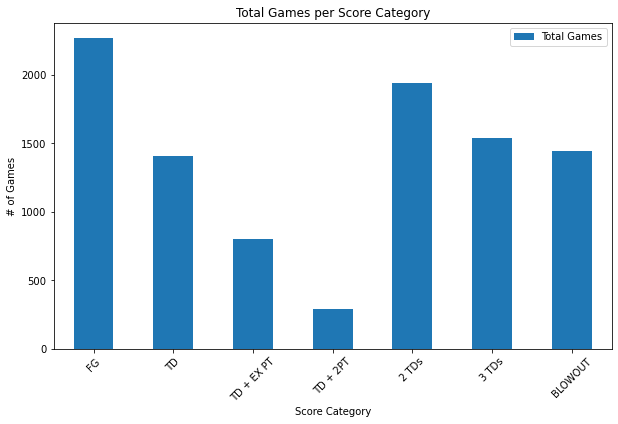

In [93]:
#graph the dataframe
score_category_summary.plot(kind='bar', xlabel='Score Category', ylabel='# of Games', title='Total Games per Score Category',
                           rot=45, figsize=(10,6))


In [55]:
#groupby playoffs and score category
score_playoff = nfl_df_analysis.groupby(['schedule_playoff', 'score_category']).game_score_diff_abs.count()
score_playoff

schedule_playoff  score_category
False             FG                2240
                  TD                1379
                  TD + EX PT         790
                  TD + 2PT           284
                  2 TDs             1924
                  3 TDs             1515
                  BLOWOUT           1424
True              FG                  28
                  TD                  29
                  TD + EX PT           8
                  TD + 2PT             3
                  2 TDs               17
                  3 TDs               20
                  BLOWOUT             18
Name: game_score_diff_abs, dtype: int64

In [56]:
score_playoff.unstack()

score_category,FG,TD,TD + EX PT,TD + 2PT,2 TDs,3 TDs,BLOWOUT
schedule_playoff,,,,,,,
False,2240,1379,790,284,1924,1515,1424
True,28,29,8,3,17,20,18


In [83]:
superbowl = nfl_df_analysis[nfl_df_analysis.schedule_week=='Superbowl']
superbowl.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,weather_wind_mph,weather_humidity,weather_detail,total_score,over_under,spread_diff,cover,spread_diff_absolute,game_score_diff_abs,score_category
449,2966,1/25/1981,1980,Superbowl,True,Oakland Raiders,27.0,10.0,Philadelphia Eagles,Philadelphia Eagles,...,0.0,NaN,DOME,37.0,under,-20.0,no,20.0,17.0,3 TDs
674,3199,1/24/1982,1981,Superbowl,True,San Francisco 49ers,26.0,21.0,Cincinnati Bengals,San Francisco 49ers,...,0.0,NaN,DOME,47.0,under,4.0,yes,4.0,5.0,TD
1476,4039,1/26/1986,1985,Superbowl,True,Chicago Bears,46.0,10.0,New England Patriots,Chicago Bears,...,0.0,NaN,DOME,56.0,over,26.0,yes,26.0,36.0,BLOWOUT
2321,4915,1/28/1990,1989,Superbowl,True,San Francisco 49ers,55.0,10.0,Denver Broncos,San Francisco 49ers,...,0.0,NaN,DOME,65.0,over,33.0,yes,33.0,45.0,BLOWOUT
2773,5385,1/26/1992,1991,Superbowl,True,Washington Redskins,37.0,24.0,Buffalo Bills,Washington Football Team,...,0.0,NaN,DOME,61.0,over,-13.0,no,13.0,13.0,2 TDs


In [87]:
superbowl_score_category = superbowl.groupby('score_category')

In [89]:
superbowl_category = (superbowl_score_category['score_category'].count() / superbowl['score_category'].count()) * 100
superbowl_category

score_category
FG            22.222222
TD            16.666667
TD + EX PT     5.555556
TD + 2PT       5.555556
2 TDs         27.777778
3 TDs         11.111111
BLOWOUT       11.111111
Name: score_category, dtype: float64

In [90]:
superbowl_summary = pd.DataFrame({"Total Games": superbowl_score_category['score_category'].count(),
                                 "Percentage of Games": superbowl_category})
superbowl_summary['Percentage of Games'] = superbowl_summary['Percentage of Games'].map("{:.2f}%".format)
superbowl_summary

,Total Games,Percentage of Games
score_category,,
FG,4,22.22%
TD,3,16.67%
TD + EX PT,1,5.56%
TD + 2PT,1,5.56%
2 TDs,5,27.78%
3 TDs,2,11.11%
BLOWOUT,2,11.11%


<AxesSubplot:title={'center':'Total Games per Score Category for the Superbowl'}, xlabel='Score Category', ylabel='# of Games'>

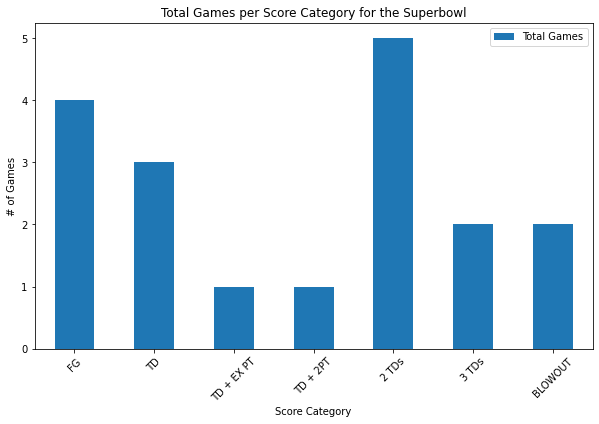

In [94]:
superbowl_summary.plot(kind='bar', xlabel='Score Category', ylabel='# of Games', title='Total Games per Score Category for the Superbowl',
                           rot=45, figsize=(10,6))

In [59]:
#percentage by score category

#score_playoff_percentage = (score_playoff["game_score_diff_abs"].count() / score_category["game_score_diff_abs"].count()) * 100
#score_playoff_percentage


In [90]:
#groupby spread favorite and cover
spread_cover = nfl_df_analysis.groupby(['spread_favorite', 'cover']).cover.count()
spread_cover.head()

spread_favorite  cover
-26.5            no       1
-24.5            no       1
-24.0            no       1
-22.5            no       1
-21.5            no       1
Name: cover, dtype: int64